## Разновидности данных и типы задач машинного обучения

На лекции мы обсуждали, что наиболее распространенными задачами машинного обучения являются классификация и регрессия. Но жизнь, как водится, богаче книги, и для каждого домена данных существует множество специфичных задач, которые с разной степенью успешности решаются специалистами в сфере МО.

In [1]:
!pip install torchaudio >> /dev/null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 18})
sns.set_style('whitegrid')

## Синтетические/геометрические данные

- Мы точно знаем все зависимости между целевой переменной и признаками, посколько задаем их сами
- Хорошо подходят для визуализации работы алгоритмов

**Внимание!** Образец хорошего оформления графика.

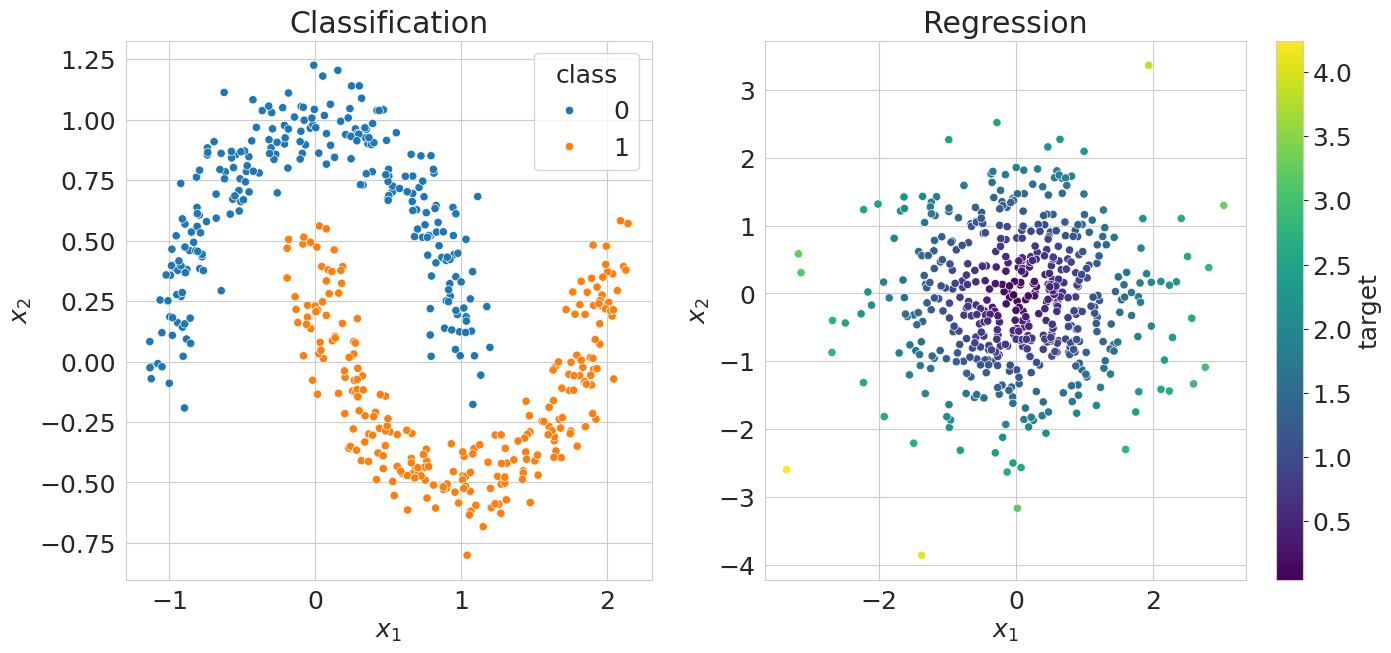

In [21]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.1, random_state=0)
fig, axs = plt.subplots(figsize=(16, 7), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1.75, 2]})
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[0])

X = np.random.randn(500, 2)
y = np.sqrt((X ** 2).sum(axis=1))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[1], palette='viridis')

axs[0].legend(title='class')
axs[0].set_title('Classification')

norm = plt.Normalize(y.min(), y.max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

axs[1].get_legend().remove()
cbar = fig.colorbar(sm, ax=axs[1])
cbar.set_label('target')
axs[1].set_title('Regression')

for ax in axs:
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

plt.show()

Примеры кластеризации на синтетических данных: https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png

## Табличные данные

Конечно, мы могли бы взять любые данные и представить их в качестве таблицы, но здесь речь идет о канонически табличных данных, когда все признаки имеют разную природу и в каком-то смысле являются отдельными, "осмысленными" измерениями.
- Это один из самых распространненых типов данных
- Обычно признаки делятся на вещественные и категориальные.

In [24]:
from sklearn.datasets import load_diabetes

X = load_diabetes()
X = pd.DataFrame(data=np.concatenate((X['data'], X['target'].reshape(-1, 1)), axis=1),
                 columns=list(X['feature_names']) + ['target'])
X

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
2   -0.002592  0.002861 -0.025930   141.0  
3    0.034309  0.022688 -0.009362   206.0  
4   -0.002592 -0.031988 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  

[442 rows x 11 columns]

In [9]:
X["target"].unique()

array([0., 1., 2.])

## Изображения

Направление машинного обучения, которое имеет дело с изображениями, называется компьютерным зрением (Computer Vision, CV). Как правило, изображения представляют в виде тензоров размерности $(H, W, C)$, где обычно $C = 3$. Содержание тензора зависит от цветового пространства, чаще всего используется RGB.

In [13]:
!wget -O image.png https://img51994.telefamily.ru/img/2020-08-24/fmt_96_24_obl.png

--2024-11-16 16:05:43--  https://img51994.telefamily.ru/img/2020-08-24/fmt_96_24_obl.png
Resolving img51994.telefamily.ru (img51994.telefamily.ru)... 176.99.3.196
Connecting to img51994.telefamily.ru (img51994.telefamily.ru)|176.99.3.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86381 (84K) [image/png]
Saving to: ‘image.png’

image.png           100%[===================>]  84.36K   312KB/s    in 0.3s    

2024-11-16 16:05:45 (312 KB/s) - ‘image.png’ saved [86381/86381]



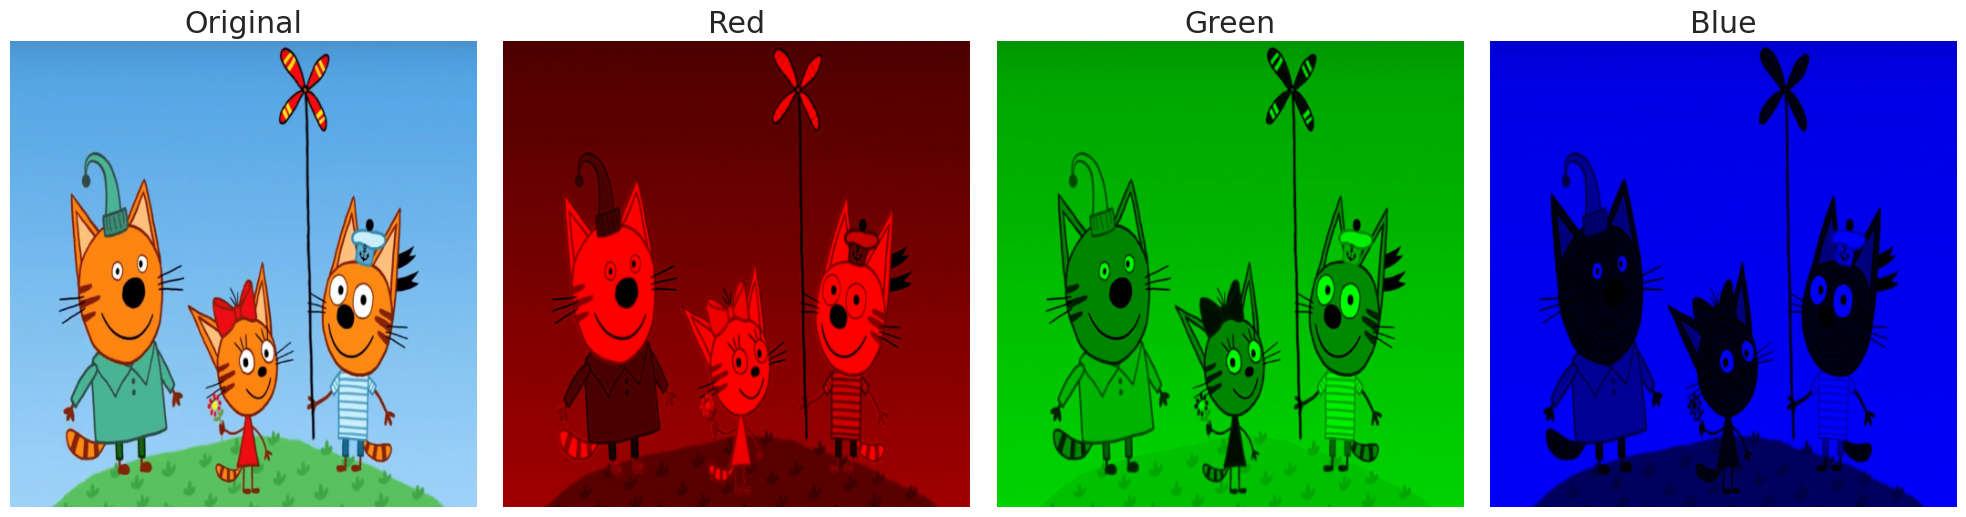

In [14]:
from skimage import io, color
from skimage.transform import resize

rgb_image = resize(io.imread('image.png'), (512, 512))
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

red_image = np.copy(rgb_image)
red_image[..., 1:] = 0.0
axs[1].imshow(red_image)

green_image = np.copy(rgb_image)
green_image[..., [0, 2]] = 0.0
axs[2].imshow(green_image)

blue_image = np.copy(rgb_image)
blue_image[..., :2] = 0.0
axs[3].imshow(blue_image)

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Red', 'Green', 'Blue']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

Иногда используют и другие цветовые пространства, например, Lab (канал светлоты и два цветовых канала).

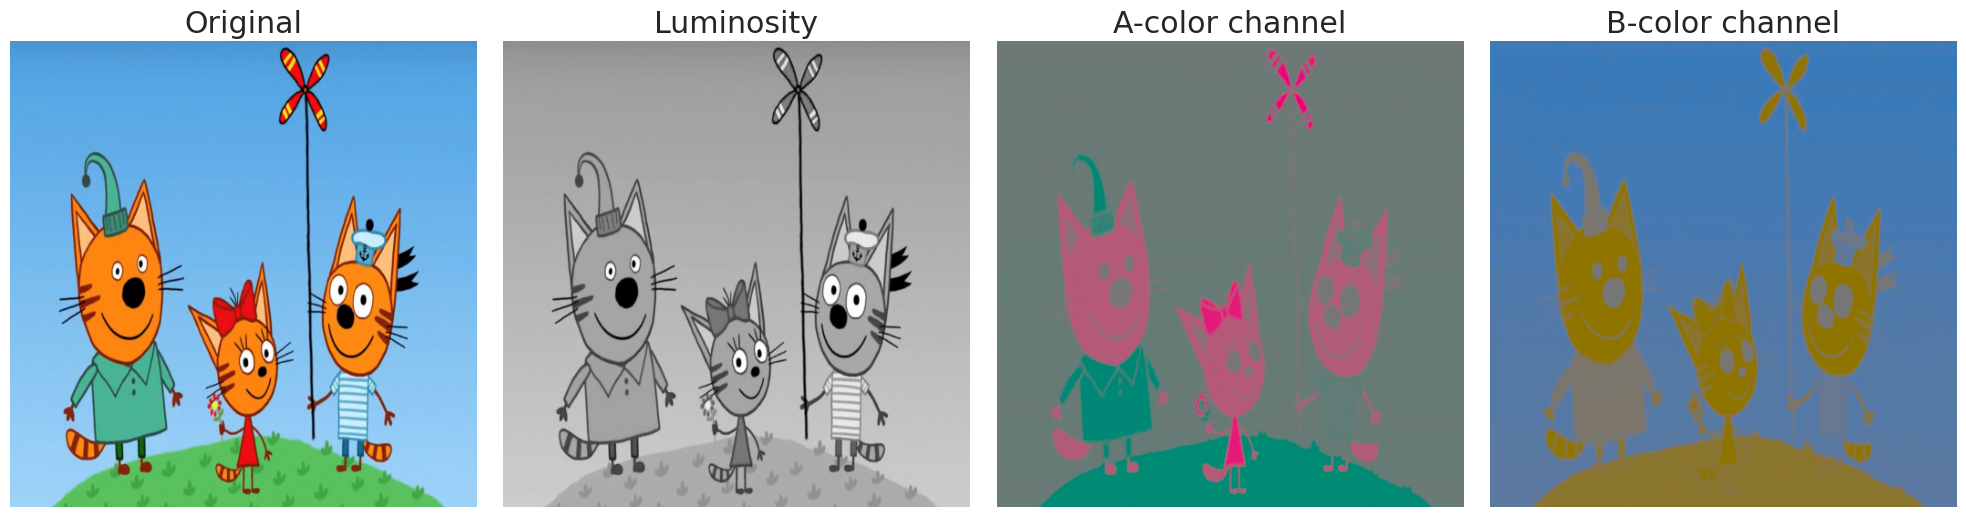

In [17]:
lab_image = color.rgb2lab(rgb_image)
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

l_image = np.copy(lab_image)
l_image[..., 1:] = 0.0
axs[1].imshow(color.lab2rgb(l_image))

a_image = np.copy(lab_image)
a_image[..., 0] = 50
a_image[..., 2] = 0
axs[2].imshow(color.lab2rgb(a_image))

b_image = np.copy(lab_image)
b_image[..., 0] = 50
b_image[..., 1] = 0
axs[3].imshow(color.lab2rgb(b_image))

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Luminosity', 'A-color channel', 'B-color channel']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

### Задачи:

**Классификация (classification)** (ImageNet, CIFAR-10/100, MNIST)


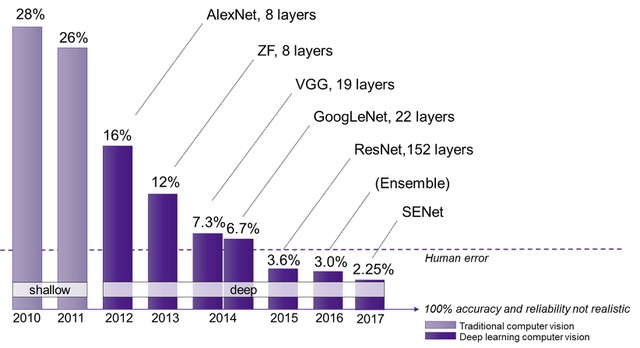

**Семантическая сегментация (semantic segmentation)** (PASCAL VOC, Cityscapes)


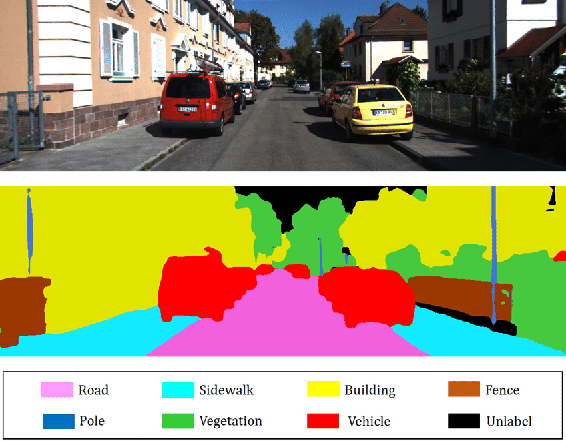

**Детекция объектов (object detection)** (COCO, PASCAL VOC)


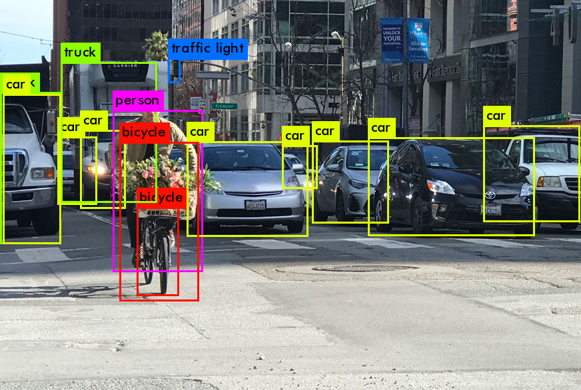

И многие-многие другие, такие как **оценка позы (pose estimation)**, **реконструкция сцены (scene reconstruction)** и т.д.

Также встречаются разного рода генеративные задачи, такие как **перенос стиля (style transfer)** или **повышение разрешения (super-resolution)**.


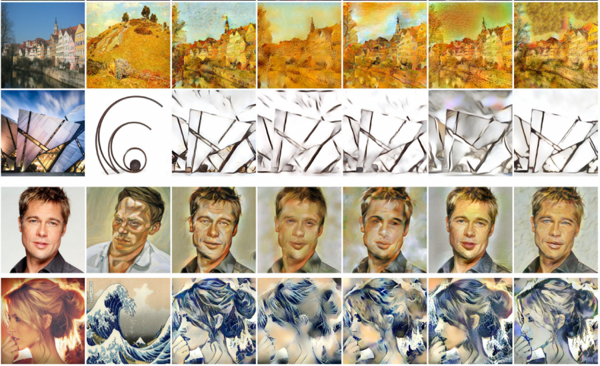

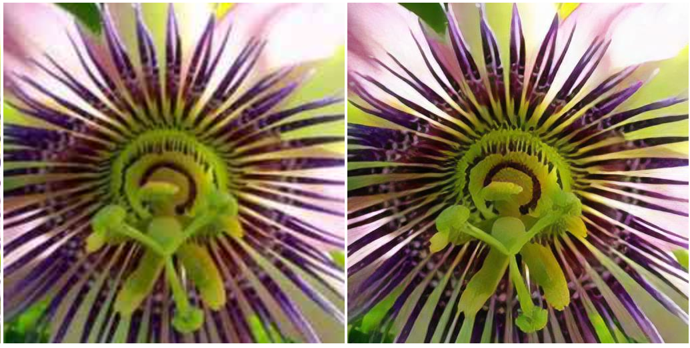

## Текстовые данные

Обработка естественного языка (Natural Language Processing, NLP) - одно из наиболее востребованных направлений в машинном обучении. Зачастую методы из NLP перекочевывают в другие домены данных и находят там успешное применение. Основными особенностями текстовых данных являются, во-первых, их дискретность, а во-вторых, последовательная структура. Как правило, при работе с текстом его токенизируют (по символам, по словам или по сочетаниям символов -- так называемый byte-pair-encoding, BPE), а затем каждому токену присваивается некоторый вектор-эмбеддинг. Такое преобразование позволяет обрабатывать дискретные данные непрерывными моделями.

В последнее время также развиваются инструменты работы с данными, которые похожи на тексты, но таковыми не являются. Например, появляются новые задачи и данные, связанные с обработкой программного кода.

## Задачи:

- **Машинный перевод (machine translation)** (WMT, IWSLT)
- **Обобщение текста (text summarization)** (GigaWord, arXiv)
- **Моделирование языка (language modelling)** (WikiText)
- **Генерация текста (text generation)** (MATH, COCO Captions)
- **Ответы на вопросы (question answering)** (SQuAD, WikiQA)
- **Определение части речи (part-of-speech tagging, POS)** (Penn Treebank)
- **Анализ эмоциональной окраски (sentiment analysis)** (SST, IMDb, Yelp)


## Аудио

Аудиозаписи часто представляют как последовательность вещественных чисел из промежутка $[-1, 1]\,$ (wav-формат). Такие аудио могут быть как одноканальными, так и многоканальными. При работе с музыкой популярен MIDI-формат. Но наиболее часто встречаются спектрограммы -- результат применения к звуковой волне преобразования Фурье или его вариаций.

In [18]:
import librosa
import torch
import torchaudio
from IPython.display import Audio

waveform, sample_rate = librosa.load(librosa.example('trumpet'))
waveform = torch.from_numpy(waveform)
Audio(waveform, rate=sample_rate)

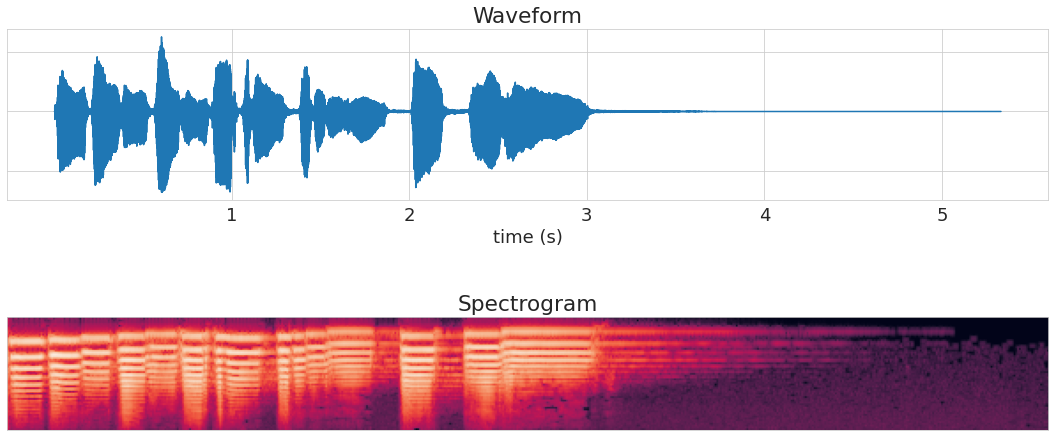

In [ ]:
spectrogramer = torchaudio.transforms.MelSpectrogram(n_mels=64, sample_rate=sample_rate)
spec = spectrogramer(waveform.unsqueeze(0)).squeeze(0)

fig, axs = plt.subplots(figsize=(15, 8), nrows=2, ncols=1, gridspec_kw={'height_ratios': [1, 2]})
axs[0].plot(waveform)
axs[1].imshow(torch.log(spec + 1e-9))

pos = (np.arange(1, 6, 1) * sample_rate).astype(int)
axs[0].set_xticks(pos)
axs[0].xaxis.set_ticklabels([str(i) for i in range(1, 6)])
axs[0].yaxis.set_ticklabels([])
axs[0].set_xlabel('time (s)')
axs[0].set_title('Waveform')
ф
axs[1].grid(False)
axs[1].xaxis.set_ticklabels([])
axs[1].yaxis.set_ticklabels([])
axs[1].set_title('Spectrogram')

plt.tight_layout()
plt.show()

### Задачи

- **Распознавание речи (automatic speech recognition, asr, speech-to-text)** (LJSpeech, LibriSpeech)
- **Синтез речи (text-to-speech, tts)**
- **Генерация музыки (music generation)**
- **Устранение шумов, улучшение речи (denoising, speech enhancement)**
- **Распознавание ключевых слов (keyword spotting, kws)**

## Видео

Работа с видео-файлами похожа на работу с изображениями: к 2 пространственным размерностям и размерности цветовых каналов добавляется время. Иногда в контексте видео рассматривают и звуковую дорожку. В целом, для видео актуальны все те же задачи, что и для изображений, с поправкой на наличие изменений сцены во времени. Среди специфичных задач можно упомянуть **optical flow** (отслеживание движения пикселей на кадрах) и **object tracking** (отслеживание движущихся объектов).



In [ ]:
from IPython.display import Image
Image(url='https://nanonets.com/blog/content/images/2019/04/sparse-vs-dense.gif')

## Графовые данные

Иногда данные имеют явную или неявную графовую структуру (например, молекулы как графы атомов или профили в социальных сетях), и при обработке было бы полезно использовать это дополнительное знание. Задачи на графах можно разделить на два типа:

1. Задачи на уровне вершин (например, определение социальной роли)
2. Задачи на уровне графов (например, классификация молекул)

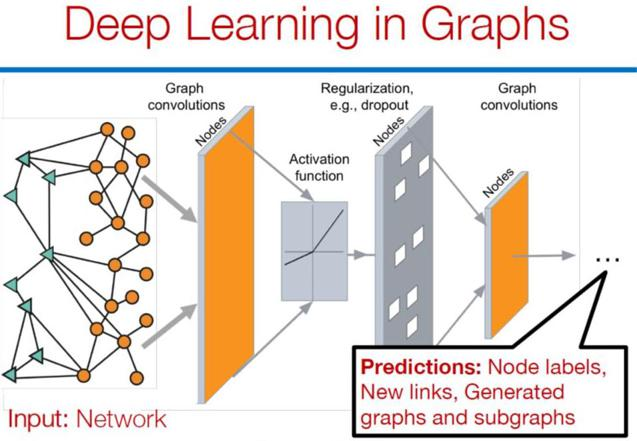

## Многодоменные задачи

Совершенствование моделей машинного обучения и рост вычислительных мощностей привели к появлению задач, затрагивающих несколько доменов данных. Вспомним задачи обработки звука: распознавание и синтез речи, по сути, представляют собой перевод из звукового домена в текстовый и обратно. Существуют примеры комбинирования текста и изображений: это Visual Question Answering (VQA) -- ответы на вопросы по изображению или text-to-image generation -- генерация изображения по текстовому запросу. Подобные задачи решаются с помощью очень больших и сложных моделей, а также требуют огромного числа данных и вычислительного бюджета. Здесь же можно вспомнить про беспилотники, которые так же обрабатывают данные очень разной природы.